# Intro to Scientific Computing

### Homework 4

NAMES:

DATE:

## Earthquakes!

In this problem, we'll work with a data set from the following data source from the USGS:

http://earthquake.usgs.gov/data/centennial/

According to the USGS website, The Centennial Catalog (Engdahl and Villaseñor, 2002) (2.75MB PDF) is a global catalog of locations and magnitudes of instrumentally recorded earthquakes from 1900 to 2008. It is being periodically updated as new arrival time data for recent years become available.

This is a catalog of large earthquakes, created with the purpose of giving a realistic picture of the seismicity distribution in the Earth. It has been assembled by combining existing catalogs, reducing all available magnitudes for each earthquake to a common, corrected magnitude (same magnitudes as List of "Preferred Magnitudes of Selected Significant Earthquakes"-Word file), and relocating the earthquakes with available arrival time data.

For recent years (1964–present) a cut-off magnitude of 5.5 has been chosen for the catalog, and the catalog is complete down to that threshold. For the period prior to 1964 (also referred to as "historical instrumental" or simply "historical" period) the cut-off considered is magnitude 6.5. Between the 1930's and 1963 the catalog is complete to te magnitude 6.5 threshold, but prior to that, the catalog is only complete down to magnitude 7.0.

We have downloaded the full file and reformatted it into a .csv format. The lines of the file have the following column headers:

date+time stamp, ignore, latitude (deg), longitude (deg), Earthquake depth (km), Earthquake Magnitude (Richter)

** Download Earthquake.csv and put it in the same folder as this notebook **

In [1]:
#standard packages
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *
from astropy.io import ascii

#packages we'll need to deal with dates
import dateutil.parser as dparser
from datetime import *

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [16]:
#read in data
eq = ascii.read("Earthquakes.csv")

print eq.colnames

['date_string', 'ignore', 'latitude', 'longitude', 'EQ_depth', 'EQ_magnitude']


In [21]:
#parse the date_string to a datetime object
eq['date']  = map(dparser.parse,eq['date_string'])

print eq['date'][0]

1900-01-05 19:00:00


In [28]:
#magnitude of the largest Earthquake recorded on Earth during the 20th Century
twentieth_cent = eq['date']<datetime(2000,01,01)

max_mag = max( eq[twentieth_cent]['EQ_magnitude'] )

print "The maximum magnitude in the 20th century was:", max_mag

The maximum magnitude in the 20th century was: 9.6


In [35]:
#When the largest earthquake happend
max_mag_select = eq['EQ_magnitude'] == max_mag

print "The magnitude",max_mag," earthquake happened on ", eq[max_mag_select]["date"][0]
#its depth
print " at a depth of ",eq[max_mag_select]['EQ_depth'][0], "km"

The magnitude 9.6  earthquake happened on  1960-05-22 19:11:00
 at a depth of  35.0 km


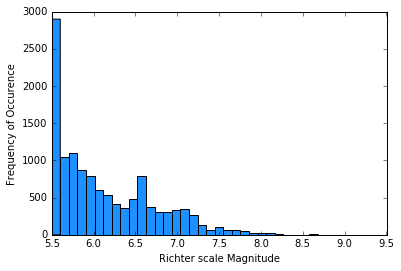

In [36]:
# frequency of Earthquakes of different magnitudes in the entire dataset
hist(eq['EQ_magnitude'], bins=40, color='DodgerBlue')  
xlim(5.5,9.5) 
xlabel('Richter scale Magnitude')
ylabel('Frequency of Occurence')  
show()

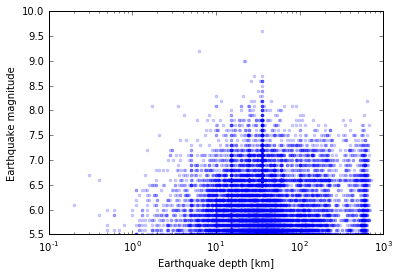

In [110]:
plot(eq["EQ_depth"],eq["EQ_magnitude"],'.',alpha=0.2)
xlabel('Earthquake depth [km]')
ylabel('Earthquake magnitude')
xscale('log')

In [51]:
mag_8 = eq['EQ_magnitude']>=8
print "median depth of Mag >=8 earthquakes: ", median(eq[mag_8]['EQ_depth'])
print "median depth of all earthquakes:", median(eq['EQ_depth'] )

median depth of Mag >=8 earthquakes:  35.0
median depth of all earthquakes: 34.3


In [61]:
print "Maximum time between mag 8 earthquakes = ", max( diff(eq[mag_8]['date']) )
print "Minimum time between mag 8 earthquakes = ", min( diff(eq[mag_8]['date']) )

Maximum time between mag 8 earthquakes =  2147 days, 4:00:00
Minimum time between mag 8 earthquakes =  0:29:00


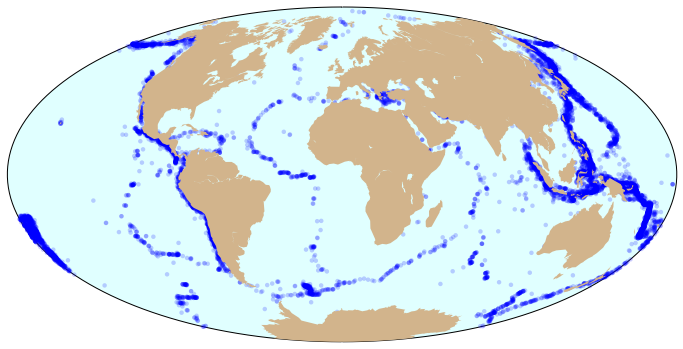

In [74]:
from mpl_toolkits.basemap import Basemap

#basic map of the earthquake locations
figure(figsize=(12,8))
m = Basemap(projection='hammer',lon_0=0)

x, y = m(eq['longitude'],eq['latitude'])

m.drawmapboundary(fill_color='LightCyan')
m.fillcontinents(color='Tan',lake_color='LightCyan')
m.scatter(x,y,marker='o',
          alpha=0.2,
          edgecolor='None')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


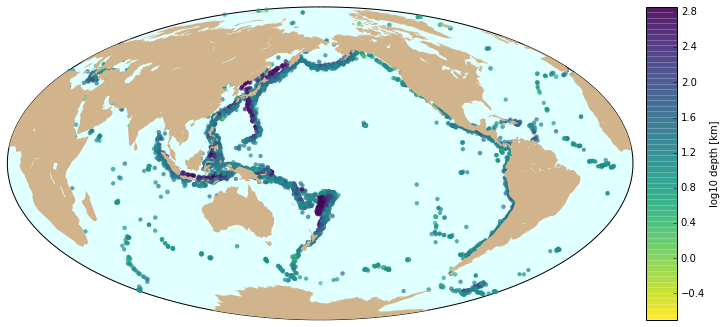

In [92]:
#Modifying the above block of code to map the distribution of magnitude 6 and larger earthquakes
mag_6 = eq['EQ_magnitude'] >= 6

#re-make the figure 
figure(figsize=(12,8))

m = Basemap(projection='hammer',lon_0=180) # centered on lon=180 (international date line)

x, y = m(eq[mag_6]['longitude'],eq[mag_6]['latitude'])

m.drawmapboundary(fill_color='LightCyan')
m.fillcontinents(color='Tan',lake_color='LightCyan')

m.scatter(x,y,
          c=log10(eq[mag_6]['EQ_depth']),
          marker='o',
          s=eq[mag_6]['EQ_magnitude']*3,
          alpha=0.7,
          edgecolor='None',
          cmap='viridis_r')

m.colorbar(label='log10 depth [km]')